In [2]:
# %matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import sweetviz as sv
import phik

from autoviz.AutoViz_Class import AutoViz_Class
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras import layers

/Users/kirillsobolev/Documents/GitHub/Advanced-data-analytics/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [4]:
# This dataset already has ID column, duplicates deleted as well as checked for NaNs 
# Levy "-"" values are corrected to 0
# Mileage is in numeric format
df = pd.read_csv('car_price_prediction.csv')
# drop mystic index column
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Quick check for NaN values and duplicates.

In [6]:
AV = AutoViz_Class()
report = AV.AutoViz("car_price_prediction.csv")
#report = AV.AutoViz("car_price_prediction.csv", chart_format="bokeh", depVar="price")

Shape of your Data Set loaded: (18924, 18)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  7
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  1
    Number of Date Time Columns =  1
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    18 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']
To fix these data quality issues in the dataset, imp

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Unnamed: 0,int64,0.000000,100,0.000000,19236.000000,Possible ID column: drop before modeling step.
Price,int64,0.000000,12,1.000000,26307500.000000,Column has 1055 outliers greater than upper bound (47161.00) or lower than lower bound(-19767.00). Cap them or remove them.
Levy,int64,0.000000,2,0.000000,11714.000000,Column has 160 outliers greater than upper bound (2292.50) or lower than lower bound(-1375.50). Cap them or remove them.
Manufacturer,object,0.000000,0,,,49 rare categories: Too many to list. Group them into a single category or drop the categories.
Model,object,0.000000,8,,,No issue
Prod. year,int64,0.000000,0,1939.000000,2020.000000,Possible date-time colum: transform before modeling step.
Category,object,0.000000,0,,,"3 rare categories: ['Pickup', 'Cabriolet', 'Limousine']. Group them into a single category or drop the categories."
Leather interior,object,0.000000,0,,,No issue
Fuel type,object,0.000000,0,,,"2 rare categories: ['Plug-in Hybrid', 'Hydrogen']. Group them into a single category or drop the categories."
Engine volume,object,0.000000,0,,,Possible high cardinality column with 107 unique values: Use hash encoding or text embedding to reduce dimension.


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/kirillsobolev/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/kirillsobolev/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/kirillsobolev/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/kirillsobolev/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/kirillsobolev/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/kirillsobolev/nltk_data...
[nltk_dat

Could not draw wordcloud plot for Model. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for Engine volume. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In every report as well as in AutoViz one of the main problem seems to be outliers. The minimal value is 1 and maximal is more than 25 million. 

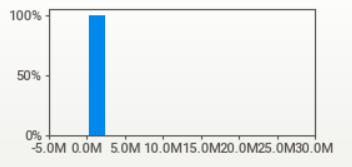

Since there is so much outliers and other noise that we can't even see any associations or anything in phik matrix or association matrxi.

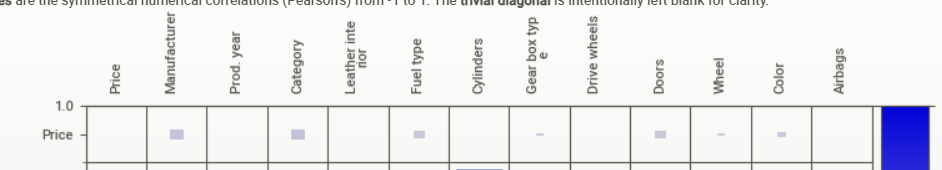

In [7]:
variable = "Price"

# Calculate Q1 and Q3, adjust for a more subtle outlier detection
Q1 = df[variable].quantile(0.15)
Q3 = df[variable].quantile(0.85)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]
print(f"Detected outliers using IQR: {outliers.shape[0]}")
df.drop(outliers.index, inplace=True)


Detected outliers using IQR: 276


In [8]:
df["Price"].describe()

count    18648.000000
mean     15819.543436
std      14105.443657
min          1.000000
25%       5175.000000
50%      12858.000000
75%      21639.000000
max      73714.000000
Name: Price, dtype: float64

Now, taking a look back on the dataset, one can see that distributions of almost every variable are highly skewed to the right (so there distribution tends to be more on the left side).

Starting from the price, cheap cars are overwhelming. I have a theory, that cheap price might mean higher Levy. So it seems to be that it might be a good idea to combine levy and price, which makes sense if you think about levy as additional fee (it just increases the price).

In [9]:
sns.histplot(data=df.Price)

<Axes: xlabel='Price', ylabel='Count'>

In [10]:
sns.scatterplot(x=df.Levy, y=df.Price, data=df)
plt.show()

Quite a lot of cheap cars have levy, let's try to combine them and see the distribution

In [11]:
df['price_levy_combined'] = df["Price"] + df["Levy"]
sns.histplot(data=df.price_levy_combined)

<Axes: xlabel='Price', ylabel='Count'>

In [12]:
df.price_levy_combined.describe()

count    18648.000000
mean     16450.774024
std      14138.253618
min          1.000000
25%       5663.000000
50%      13485.000000
75%      22125.000000
max      74809.000000
Name: price_levy_combined, dtype: float64

In [13]:
df.drop(["Price","Levy"], axis=1, inplace=True)

Now it's getting better, but there are still mystic cheap cars with a price of 1 dollar even combined with levy. I suggest to cut more outliers, especially from smaller quantiles. I would like to use isolation forest algorythm, but before that it is required to handle all categorical values.

In [14]:
# Generate the data profiling report
report = ProfileReport(df, title='car price')
report.to_file("ydata.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 116.77it/s]


<h1>Ydata report</h1>
Ydata profiling alerting these:

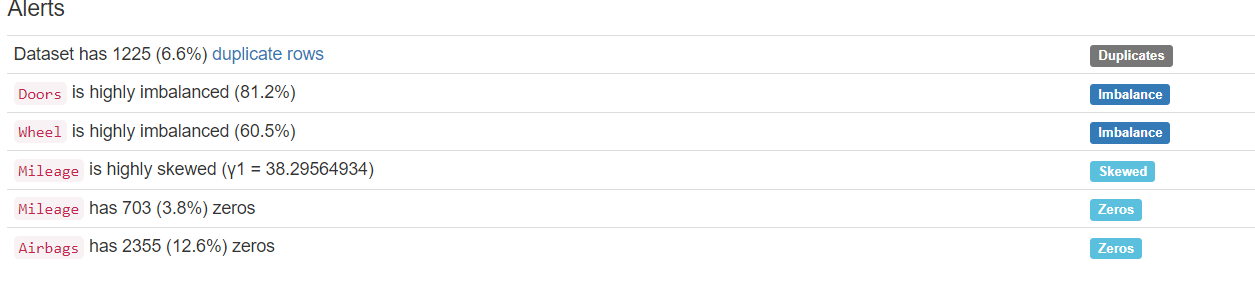
Hard to say where did the duplicates came from, but I suggest that in original dataset there were otherwise same cars but with different ID, so after removing ID column I need to delete duplicates again

In [15]:
df.drop_duplicates(inplace=True)

<h3>Doors</h3>

First of all it has wrong data format, I bet it supposed to be 2-3, 3-5 insted of date (second number stands for month)

Second problem is that basically column Category is dependent on doors amount. Every coupe or cabriolet has 2-3 doors, every sedan, universal or hatchback has 3-5 doors and etc. For me it seems like it only creating noise.

And the last problem is that it is super imbalanced.

I believe that it is possible to drop this column

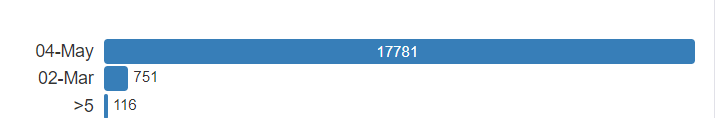

In [16]:
df.drop("Doors", axis=1, inplace=True)

<h3>Mileage</h3>
While it says that mileage is skewed, I think the more real problem is in outliers:

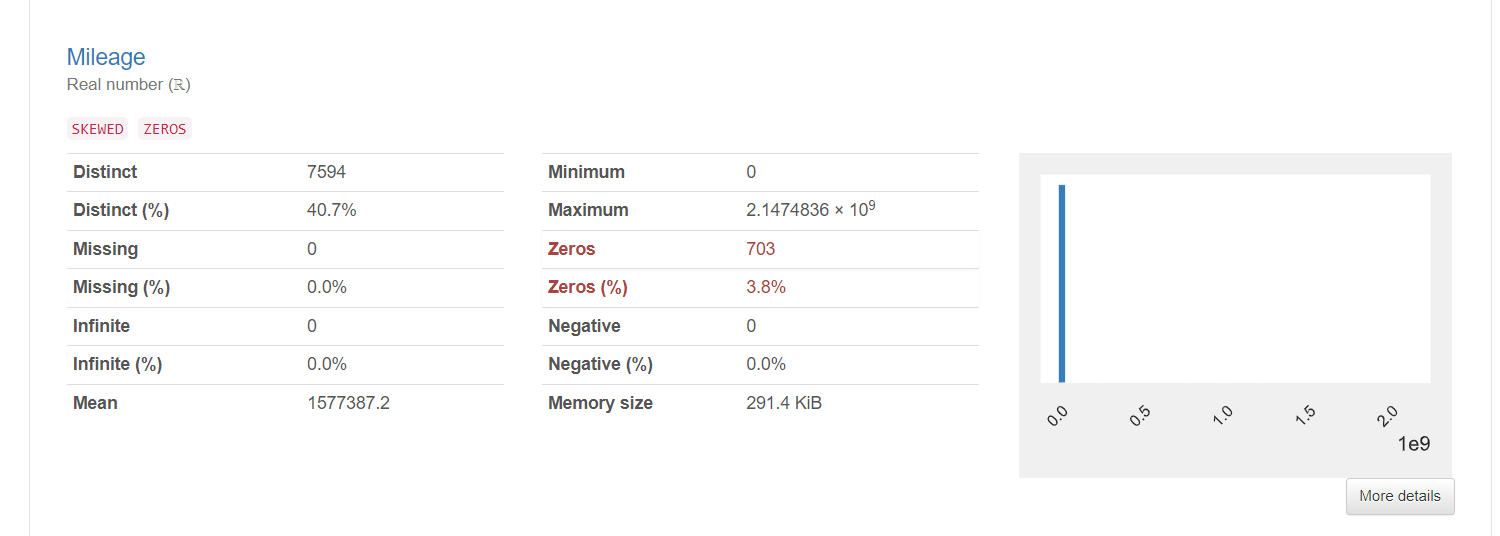
Brand new cars has 0 mileage, while some has more then 2 billions kilometers. Also extremely high values look suspisiously synthetic

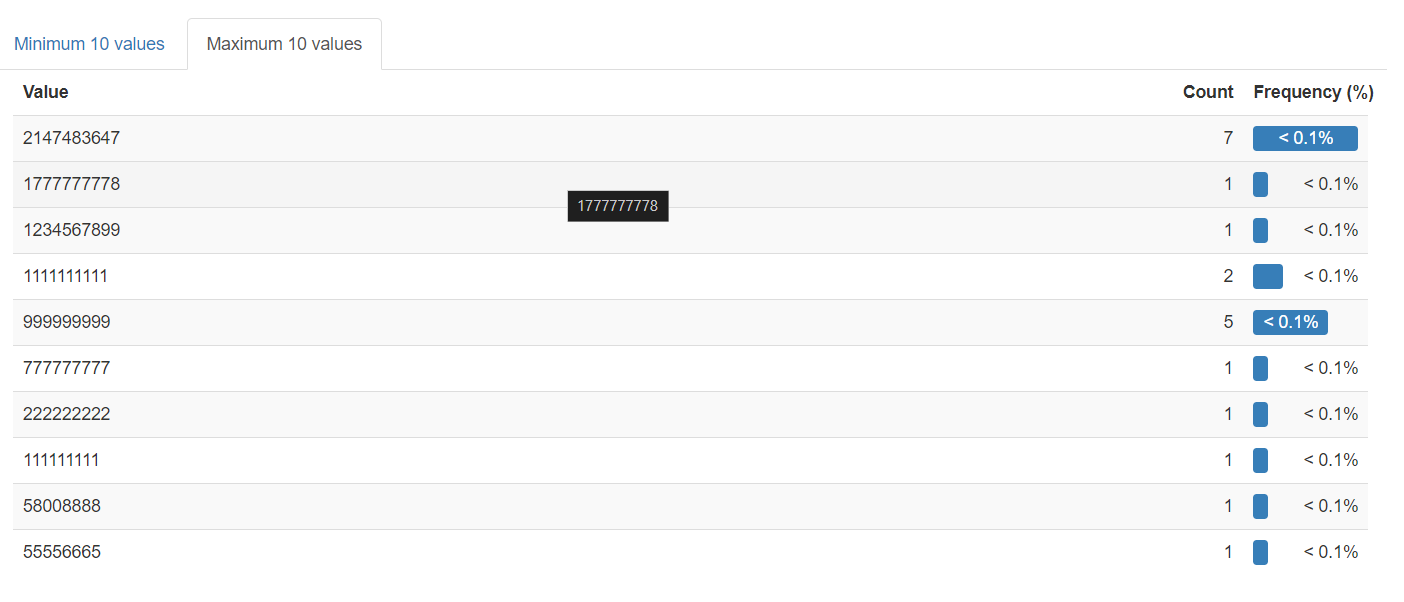

This needs to be cleared of outliers. I'll perform it later with isolation forest.

<h3>Airbags</h3>
Distribution of airbags is not optimal, I believe joining them into the buckets might help.

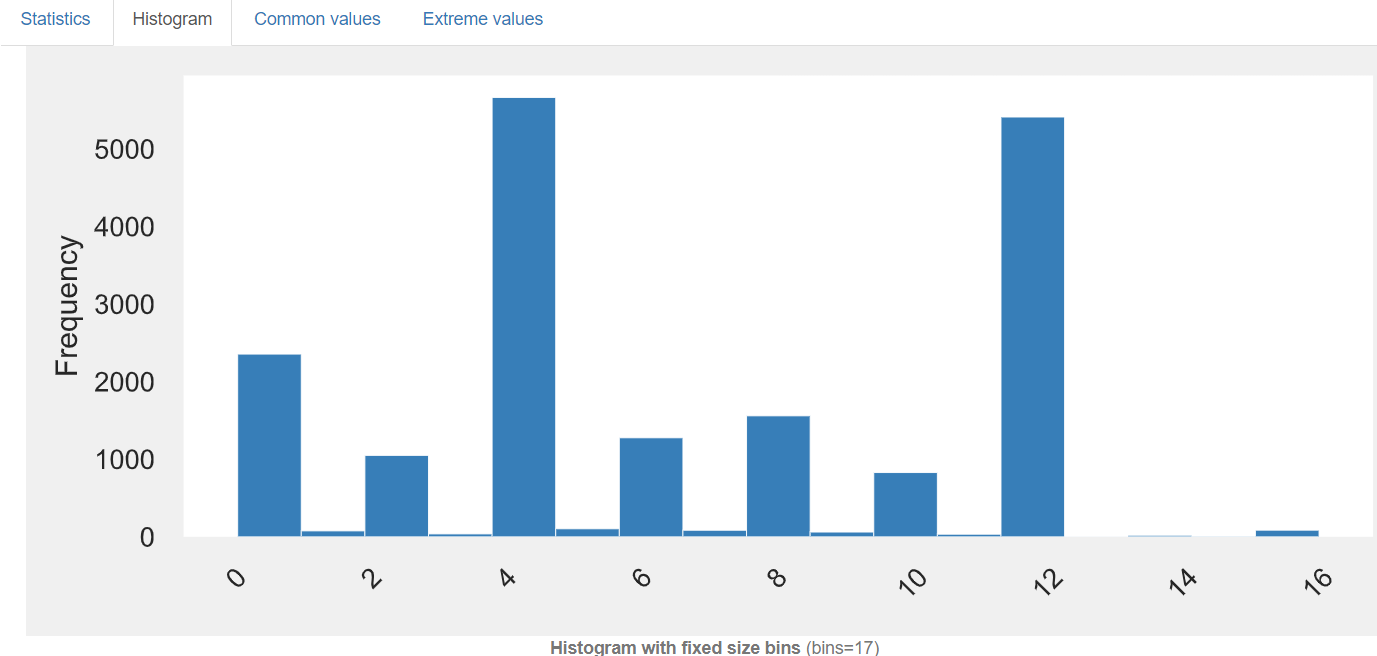

I suppose something like:


0-1 - has it's own bucket, because it means that there is 0 safety


2-6 - some of the safety for front seats and sometimes rear seats


7-12 - meaning good safety 


12+ - meaning safety overshoot (is it correct to call it like that?)

In [17]:
bins = [-1, 1, 6, 12, 16]
labels = [0 , 1, 2, 3]

df["Airbags_bins"] = pd.cut(df["Airbags"], bins=bins, labels=labels, right=True)

sns.histplot(data=df.Airbags_bins)

<Axes: xlabel='Airbags_bins', ylabel='Count'>

In [18]:
df.drop("Airbags", axis=1, inplace=True)

<h3>Wheel</h3>
Imbalanced, yes. Hard to say how to correct that, because right wheeled cars are dominant only in specific countries, such as UK or Japan. Rest of the market is for left sided cars.

Also I'm not sure how exactly wheel's side could affect the price.
May be it's easier to get rid of this column

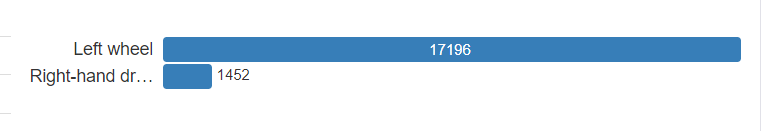

<h3>Engine volume</h3>
Engine volume consist of float number indicating volume and sometimes also mention if it is turbo or not. 

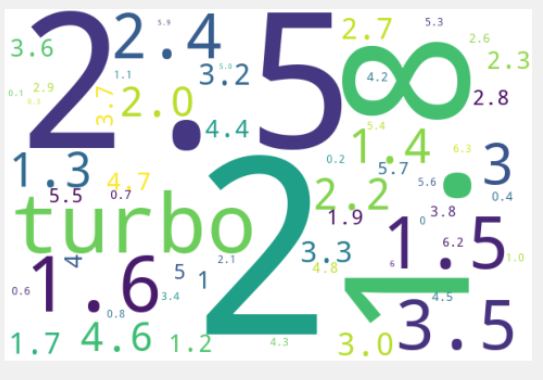

In [19]:
# separate number and Turbo
def process_engine(engine_value):
    # Extract the numeric part using regex
    # \d means any number between 0-9
    number = re.search(r'\d+\.\d+|\d+', engine_value)
    # save our extracted float
    number = float(number.group())

    # Check if "Turbo" is in the string
    turbo = 1 if "Turbo" in engine_value else 0

    return number, turbo

# Apply the function to the DataFrame
df[['Engine volume int', 'Turbo']] = df['Engine volume'].apply(lambda x: pd.Series(process_engine(x)))

# Drop the old Engine column
df.drop('Engine volume', axis=1, inplace=True)


<h1>Phik matrix</h1>

In [20]:
# Calculate the Phik correlation matrix
phik_matrix = df.phik_matrix()

# Display the correlation matrix
phik_matrix

interval columns not set, guessing: ['Prod. year', 'Mileage', 'Cylinders', 'price_levy_combined', 'Engine volume int', 'Turbo']


,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,price_levy_combined,Airbags_bins,Engine volume int,Turbo
Manufacturer,1.000000,0.999989,0.794376,0.685346,0.577180,0.670874,0.000000,0.574735,0.691634,0.851451,0.553901,0.357896,0.431772,0.531885,0.585847,0.454979
Model,0.999989,1.000000,0.945211,0.971641,0.791411,0.907335,0.000000,0.883476,0.859720,0.976780,0.882377,0.699939,0.716229,0.714798,0.922974,0.753769
Prod. year,0.794376,0.945211,1.000000,0.424726,0.446172,0.303045,0.141735,0.213023,0.493948,0.394729,0.297102,0.274846,0.443982,0.282779,0.169552,0.104498
Category,0.685346,0.971641,0.424726,1.000000,0.384362,0.476801,0.013448,0.226434,0.513795,0.609401,0.349106,0.238599,0.286746,0.230121,0.367566,0.306404
Leather interior,0.577180,0.791411,0.446172,0.384362,1.000000,0.184839,0.031961,0.256503,0.616385,0.029272,0.484799,0.242358,0.363182,0.191028,0.129709,0.124854
Fuel type,0.670874,0.907335,0.303045,0.476801,0.184839,1.000000,0.114021,0.159128,0.343704,0.256749,0.142355,0.355662,0.304670,0.315840,0.148113,0.234228
Mileage,0.000000,0.000000,0.141735,0.013448,0.031961,0.114021,1.000000,0.000000,0.037259,0.014015,0.019857,0.066908,0.000000,0.031109,0.000000,0.000000
Cylinders,0.574735,0.883476,0.213023,0.226434,0.256503,0.159128,0.000000,1.000000,0.264603,0.564378,0.202912,0.127802,0.174737,0.275110,0.836797,0.069844
Gear box type,0.691634,0.859720,0.493948,0.513795,0.616385,0.343704,0.037259,0.264603,1.000000,0.282359,0.304246,0.269622,0.291508,0.471506,0.180437,0.543491
Drive wheels,0.851451,0.976780,0.394729,0.609401,0.029272,0.256749,0.014015,0.564378,0.282359,1.000000,0.021195,0.189912,0.146842,0.182376,0.418407,0.145647


<h3>Model</h3>
Model is highly dependant on manufacturer, which makes sense because every manufacturer has own series of cars.
I believe it is some kind of generalizing variable, which collects almost everything else in this dataset.

For example all cars within same model name will almost everytime have same category, fuel type, engine volume range, cylinders, airbags and etc.

On the top of that, there are too much distinct values.

In [21]:
df.drop("Model", inplace=True, axis=1)

<h3>Color</h3>
Color has quite low impact on price, unless it is combination of rare car and rare color

In [22]:
df.drop("Color", inplace=True, axis=1)

<h3>Leather interioir<h3>

In [23]:
variable = 'Leather interior'

# NOTE: factorize can mix up the order of the values
values1, names1 = pd.factorize(df[variable], sort=False)
df[variable] = values1

<h3>Wheel</h3>
For now let's reorganize it to binary numerical category

In [24]:
variable = 'Wheel'

# NOTE: factorize can mix up the order of the values
values1, names1 = pd.factorize(df[variable], sort=False)
df[variable] = values1

In [25]:
# can process the whole dataset 
# and compares variables to each other instead
# of focusing on outliers on a single variable
from sklearn.ensemble import IsolationForest

# adjust the contamination rate as you see fit
# for example, if you expect 5% of the data to be outliers
# you can use 0.05 etc. 
iso = IsolationForest(contamination=0.075) 

# handle text variables, also I'm more interested in mileage and price outliers then in those
df_out = df.drop(['Manufacturer', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels'], axis=1)

# fit isolation forest
y_pred = iso.fit_predict(df_out)

# filter outliers only
outliers = df_out[y_pred != 1]
df.drop(outliers.index, inplace=True)

After inspection with data wrangler I've found out that not all of the outliers I wanted to be caught are deleted.
Time to get hands dirty, I guess.

In [26]:
# Cut the lowest price to 1000
df = df[df["price_levy_combined"] > 1000]


In [27]:
# There are few cars producted in 1950-s which has pretty strange price and mileage
df = df[df["Prod. year"] > 1995]

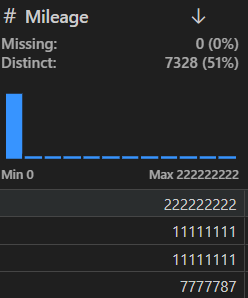

In [28]:
df = df[df["Mileage"] < 400000]

Hyundai with 20 L engine anyone?

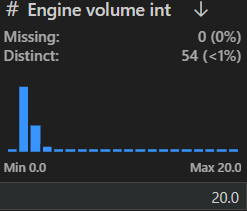

In [29]:
df = df[df["Engine volume int"] < 7]

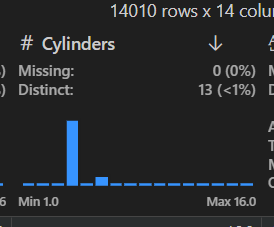

In [30]:
# Usual amount of cylinders is 4-8 I'd say.
# I can imagine a car with 3 cylinders, but not in 1 or 2. 
# In this dataset there quite new cars with 1 or 2 cylinders 
# As well as brand new sedans (not even good wagons) with 14 cylinders for 8000 dollars (levy included)
df = df[df["Cylinders"] > 3]
df = df[df["Cylinders"] < 9]


Now let's see the reports again

In [31]:
# Generate the data profiling report, title is just 
report = ProfileReport(df, title='car price')
report.to_file("ydata_after.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 343.85it/s]


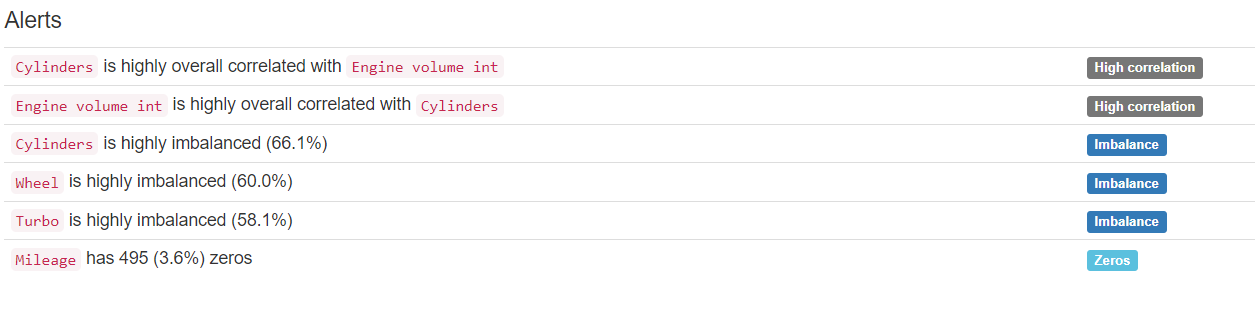

Correlation between cylinders andengine volume is quite understandable. Usually the more cylinders the more engine volume.

However I might consider deleting it as well. There is almost no correlation between cylinders and final price

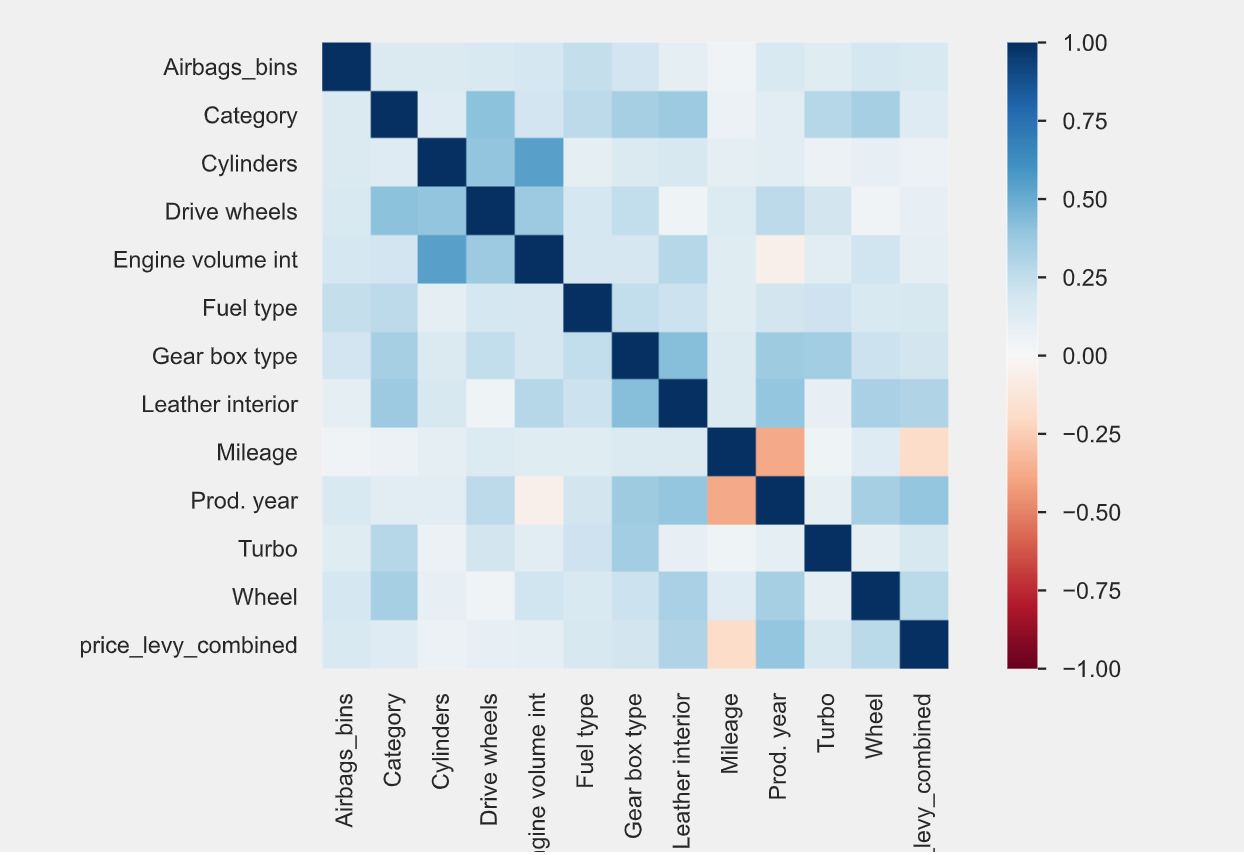

Another thing to consider is drive wheels. Correlation with price quite low and as we can see in next cells, it's might be overlapping with engine volume and car category.

In [32]:
# Again duplicates
df = df.drop_duplicates()

In [33]:
# Calculate the Phik correlation matrix
phik_matrix = df.phik_matrix()

# Display the correlation matrix
phik_matrix

interval columns not set, guessing: ['Prod. year', 'Leather interior', 'Mileage', 'Cylinders', 'Wheel', 'price_levy_combined', 'Engine volume int', 'Turbo']


,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,price_levy_combined,Airbags_bins,Engine volume int,Turbo
Manufacturer,1.000000,0.570027,0.641297,0.564146,0.652362,0.314107,0.634614,0.683699,0.845454,0.510290,0.445178,0.522847,0.696266,0.434652
Prod. year,0.570027,1.000000,0.262853,0.469496,0.366173,0.564561,0.244901,0.510946,0.381748,0.440957,0.591718,0.235761,0.282443,0.111472
Category,0.641297,0.262853,1.000000,0.384420,0.482856,0.145747,0.227921,0.520536,0.571136,0.345038,0.295038,0.232311,0.390976,0.293087
Leather interior,0.564146,0.469496,0.384420,1.000000,0.205800,0.183662,0.142215,0.613800,0.023424,0.477351,0.378940,0.113496,0.340236,0.123981
Fuel type,0.652362,0.366173,0.482856,0.205800,1.000000,0.243820,0.144814,0.343702,0.242828,0.146171,0.305376,0.334922,0.190356,0.187127
Mileage,0.314107,0.564561,0.145747,0.183662,0.243820,1.000000,0.209743,0.232235,0.224362,0.158687,0.341412,0.059429,0.210102,0.057437
Cylinders,0.634614,0.244901,0.227921,0.142215,0.144814,0.209743,1.000000,0.172931,0.467751,0.089624,0.152105,0.197631,0.903599,0.041128
Gear box type,0.683699,0.510946,0.520536,0.613800,0.343702,0.232235,0.172931,1.000000,0.249401,0.331891,0.291974,0.453887,0.273976,0.536679
Drive wheels,0.845454,0.381748,0.571136,0.023424,0.242828,0.224362,0.467751,0.249401,1.000000,0.033021,0.143098,0.181616,0.565345,0.116209
Wheel,0.510290,0.440957,0.345038,0.477351,0.146171,0.158687,0.089624,0.331891,0.033021,1.000000,0.318136,0.251256,0.431933,0.134471


In [34]:
# analyze and create HTML-report
report = sv.analyze(df)
report.show_html('sv_report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sv_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


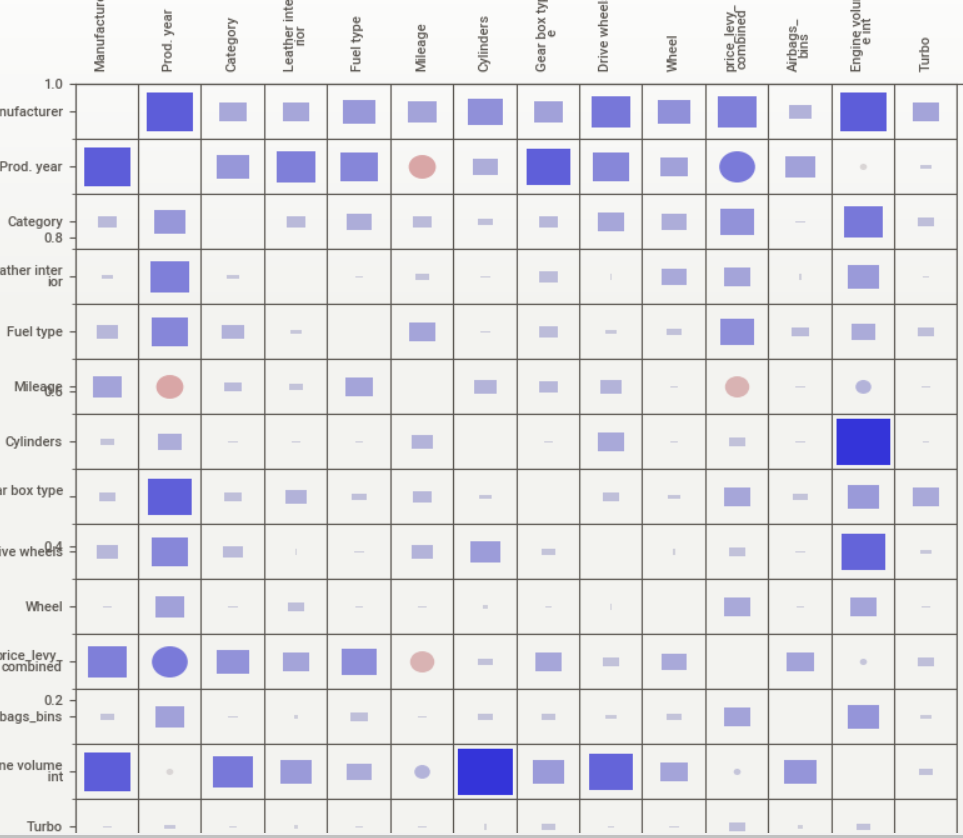

<h1>Text categorical variables</h1>

In [35]:
# Replace cabriolet to coupe
df["Category"].replace("Cabriolet", "Coupe", inplace=True)
# encode categorical column into seperate features
variable = 'Category'
dummies = pd.get_dummies(df[variable]).astype(int)
df = pd.concat([df, dummies], axis=1).drop(columns=variable)
# Drop limousine to decrease multidimensionality
df.drop("Limousine", axis=1, inplace=True)

In [36]:
# search for the index of the row with fuel type hydrogen
i = df[df["Fuel type"] == "Hydrogen"].index
# Drop the hydrogen
df.drop(i, inplace=True)

# join hybrids
df.replace("Plug-in Hybrid", "Hybrid", inplace=True)
# Encode column and drop CNG to decrease column amount
variable = 'Fuel type'
dummies = pd.get_dummies(df[variable]).astype(int)
df = pd.concat([df, dummies], axis=1).drop(columns=variable)
df.drop("CNG", axis=1, inplace=True)


In [37]:
# Encode column and drop last feature to decrease column amount
variable = 'Gear box type'
dummies = pd.get_dummies(df[variable]).astype(int)
df = pd.concat([df, dummies], axis=1).drop(columns=variable)

df.drop("Tiptronic", axis=1, inplace=True)


In [38]:
# Encode column and drop last feature to decrease column amount
variable = 'Drive wheels'
dummies = pd.get_dummies(df[variable]).astype(int)
df = pd.concat([df, dummies], axis=1).drop(columns=variable)

df.drop("Rear", axis=1, inplace=True)

In [39]:
# Updatred dictionary with countries of origin
# Most of them are joined to "Other", because of the imbalance 
car_manufacturers = {
    "Japan": ['LEXUS', 'HONDA', 'TOYOTA', 'NISSAN', 'SUBARU', 'MITSUBISHI', 'MAZDA', 'SUZUKI', 'ACURA', 'ISUZU', 'DAIHATSU', 'INFINITI', 'SCION'],
    "USA": ['CHEVROLET', 'FORD', 'JEEP', 'GMC', 'LINCOLN', 'DODGE', 'CHRYSLER', 'TESLA', 'BUICK', 'CADILLAC', 'HUMMER', 'MERCURY', 'PONTIAC', 'SATURN'],
    "South Korea": ['HYUNDAI', 'KIA', 'DAEWOO', 'SSANGYONG'],
    "Germany": ['MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'VOLKSWAGEN', 'AUDI'],
    "Other": ['SKODA', 'სხვა', 'SEAT', 'VOLVO', 'SAAB','VAZ', 'GAZ', 'UAZ', 'MOSKVICH', 'ZAZ',
              'HAVAL', 'GREATWALL', 'FIAT', 'ALFA ROMEO', 'LANCIA', 'MASERATI', 'FERRARI', 'LAMBORGHINI',
              'LAND ROVER', 'MINI', 'JAGUAR', 'BENTLEY', 'ROLLS-ROYCE', 'ROVER', 'ASTON MARTIN', 'MG',
              'RENAULT', 'CITROEN', 'PEUGEOT']
}

# Now map a country to each manufacturer

# empty dictionary to store the mappings
manufacturer_to_country = {}

# Loop over each country and its list of manufacturers
for country, manufacturers in car_manufacturers.items():
    # For each manufacturer in the list, assign the country as the value
    for manufacturer in manufacturers:
        manufacturer_to_country[manufacturer] = country

# Create new column for country of origin and map it based on manufacturer
df['Country'] = df['Manufacturer'].map(manufacturer_to_country)



In [40]:
sns.histplot(data=df["Country"])

<Axes: xlabel='Country', ylabel='Count'>

In [41]:
# encode categorical column into seperate features
variable = 'Country'
dummies = pd.get_dummies(df[variable]).astype(int)
df = pd.concat([df, dummies], axis=1).drop(columns=variable)

# Finally drop the manufacturer column, model, "other".
# Model column has almost 1600 distinct values and is basically just a name for the car, pretty similar to ID column
# I think there is no way to get any information out of model

df.drop(["Manufacturer", "Other"], axis=1, inplace=True)

In [42]:
# Save df to csv to use for trial ANN training
df.to_csv("cars_optimized.csv")

In [43]:
X = df.drop("price_levy_combined", axis=1)
y = df["price_levy_combined"]

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
# VIF = Variance Inflation Factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  

# variables with high VIF-value 
# can mean multlicollinearity (variables providing same linear
# relationships in the data, potentially confusing the ML algorithm
# this might be good info when deciding if some variable needs to be removed
print(vif_data)

        feature            VIF    
0          Prod. year  6710.480133
1    Leather interior     2.268986
2             Mileage     3.959897
3           Cylinders    80.271198
4               Wheel     1.479721
5        Airbags_bins     7.554450
6   Engine volume int    35.871320
7               Turbo     1.531376
8               Coupe   202.458462
9         Goods wagon    91.750227
10          Hatchback  1073.643184
11               Jeep  1754.319021
12           Microbus    84.950399
13            Minivan   219.699446
14             Pickup    16.809751
15              Sedan  2967.506572
16          Universal   135.057844
17             Diesel    10.525349
18             Hybrid     8.842256
19                LPG     2.653248
20             Petrol    24.753387
21          Automatic     6.085595
22             Manual     2.355221
23           Variator     1.549904
24                4x4     3.418553
25              Front    13.840714
26            Germany    10.917714
27              Japa

VIF test looks quite good, despite categorical variables that is obviously meaning different variants of the same category 

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
2,Mileage,374577618.62
16,Universal,7941.03
28,South Korea,7905.11
17,Diesel,7896.30
29,USA,7651.04
13,Minivan,7202.24
19,LPG,7171.84
18,Hybrid,6919.27
11,Jeep,6762.78
24,4x4,6281.09


Mileage seems to be overwhelming, but it is understanble, I think?

Production year seems to be not affecting at all, but common sense tells that it should. Possible noise or outliers?

In [46]:
variable = "price_levy_combined"

# Calculate the median
median = df[variable].median()

# Calculate MAD
mad = np.median(np.abs(df[variable] - median))

# Define a threshold for noise detection
threshold = 4 * mad

# Detect noise
noise = df[np.abs(df[variable] - median) > threshold]

print("Detected noise using MAD:")
noise

Detected noise using MAD:


,Prod. year,Leather interior,Mileage,Cylinders,Wheel,price_levy_combined,Airbags_bins,Engine volume int,Turbo,Coupe,Goods wagon,Hatchback,Jeep,Microbus,Minivan,Pickup,Sedan,Universal,Diesel,Hybrid,LPG,Petrol,Automatic,Manual,Variator,4x4,Front,Germany,Japan,South Korea,USA
14,2016,0,76000,4.00,0,60355,1,2.00,0.00,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
36,2019,1,10200,4.00,0,52823,2,2.00,0.00,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
41,2016,0,61057,4.00,0,46825,1,2.50,0.00,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
47,2017,0,100734,4.00,0,56407,1,2.00,0.00,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
72,2017,0,111643,4.00,0,45201,1,2.50,0.00,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18802,2018,0,4093,4.00,0,52197,2,2.00,1.00,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
18834,2017,0,67365,4.00,0,57831,1,2.00,0.00,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0
18851,2012,0,97000,6.00,0,64290,2,3.50,0.00,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0
18870,2020,0,5305,4.00,0,64962,1,2.00,0.00,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0


In [47]:
# Plot setup
plt.figure(figsize=(10, 6))

# which variable we are visualizing, usually a variable 
# we detected the outliers from or target variable
variable = "Prod. year"

# NOTE! outliers is the dataframe that contains only the outliers or noise items

# Plot the full dataset (in blue, for example)
sns.scatterplot(x=df.index, y=df[variable], color='blue', label='All Data')

# Overlay the outliers (in red)
sns.scatterplot(x=outliers.index, y=outliers[variable], color='red', label='Outliers/Noise')

# Add title and labels
plt.title(f'Comparison of All Data and Outliers for {variable}')
plt.xlabel('Index')
plt.ylabel('Variable Values')

# Show legend
plt.legend()

# Display the plot
plt.show()

to be continued

To consider:

<h3>Imbalance:</h3>
Binning gear box type to auto / manual

Same for fuel type, think about joining some of them into same category

Car categories with low amount of entries might be joined to "other" category?

Drive wheel, turbo and wheel are super imbalanced. However, while training the model, just deleting the columns were not enough and accuracy decreased.

Joining cylinders to categories "less than 4" and "more than 4" didn't help


Short conclusion:
Target variable distribuiton is skewed to right, amount of cheap cars are same or even bigger than amount of average cars.
A lot of not balanced variables, almost every column has problems with that.
Not so much overlapping data, however some redundancy in few features (like car category, engine volume, drive wheels and cylinders) but seems that this problem is deeply integrated in dataset and quite problematic to fix.
Quite a lot of duplicates (some have different IDs) as well as outliers (from time to time very extreme and unrealistic), dataset seems quite synthetic.


Optimizing dataset without any plan was quite a mess, so here is a short plan for next exercises:

1. Quick check for duplicates and missing values
2. Using ydata-profiling check variables for wrong format( extra marks is values, like "111 km" in mileage, or anomalies from e.g. Excel), hidden missing values (like '-' values in levy).
3. Think about how related and how much affect do variables have on target variable
4. Explore variables, find imbalance, fix as much as possible. Could be fixed by deleting columns, bucketing, joining variables. Try to save as much data as possible.
5. Check for outliers and handle them, using autoviz, EDA or pretty much any other tool (extreme outliers could be easily seen on distributions even in Data wrangler for example)
6. Check sweetviz assosiation matrix, phik matrix and correlation matrix. Check if variables from #3 are usefull, check others as well.
7. Think about overlapping variables using phik matrix and MAD noise detection.
8. Handle these overlapping, noisy or simply useless variables.
9. Take a look one more time on data, clean up more outliers if needed manually, run reports (autoviz and ydata for example) again.
10. Check one more time for duplicates